In [356]:
# Import Dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [357]:
# Make a reference to the crimes.csv file path
csv_path = "/Users/jstrawin/Desktop/Project3/Resources/Crimes_2019.csv"

# Import the crimes.csv file as a DataFrame
crimes_df = pd.read_csv(csv_path, encoding="utf-8")
crimes_df = crimes_df.dropna()
crimes_df['Date'] = pd.to_datetime(crimes_df['Date']).dt.date
crimes_df['Date'] = pd.to_datetime(crimes_df.Date,format='%Y-%m-%d %H:%M')
crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11858381,JC469488,2019-10-11,021XX W 72ND PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.676928,"(41.762038621, -87.676927902)",17.0,22257.0,65.0,433.0,31.0,23.0,17.0,7.0
1,11858167,JC469480,2019-10-11,046XX W HARRISON ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.741427,"(41.873224961, -87.741426819)",36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0
2,11858286,JC469479,2019-10-11,081XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,-87.605120,"(41.747170897, -87.605119541)",9.0,21546.0,40.0,247.0,35.0,61.0,20.0,235.0
3,11858203,JC469489,2019-10-11,005XX W 61ST PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.638476,"(41.782606021, -87.638476359)",53.0,21559.0,66.0,166.0,4.0,11.0,17.0,135.0
4,11858205,JC469526,2019-10-11,007XX E 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,...,-87.605637,"(41.707455731, -87.605637491)",9.0,21861.0,47.0,643.0,35.0,19.0,10.0,250.0


In [358]:
### Check how many arrest are there
crimes_df.Arrest.value_counts()

False    157621
True      42667
Name: Arrest, dtype: int64

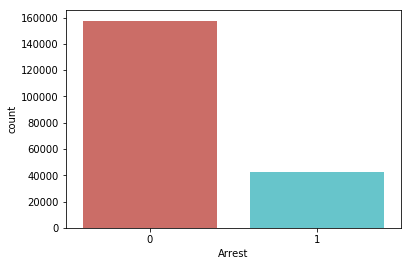

In [359]:
reduced_df.Arrest.value_counts()
sns.countplot(x = 'Arrest', data = reduced_df, palette = 'hls')
plt.show()

In [360]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "IUCR", "Primary Type", Arrest", "Community Area", "Date"

reduced_df = crimes_df.drop(["ID", "Case Number", "Block", "Description", "X Coordinate", "Y Coordinate", "Year", "Updated On",\
                             "Latitude", "Longitude", "Location","Boundaries - ZIP Codes", "Zip Codes","Historical Wards 2003-2015"\
                            ,"Census Tracts","Police Beats", "Police Districts", "Wards", "Location Description", "Domestic", "Beat", "District", "Ward", "FBI Code", "Community Areas"], axis=1)
reduced_df.head()

,Date,IUCR,Primary Type,Arrest,Community Area
0,2019-10-11,0810,THEFT,False,67.0
1,2019-10-11,143A,WEAPONS VIOLATION,True,25.0
2,2019-10-11,0460,BATTERY,False,44.0
3,2019-10-11,143A,WEAPONS VIOLATION,True,68.0
4,2019-10-11,1310,CRIMINAL DAMAGE,False,50.0


In [361]:
reduced_df["IUCR"].value_counts()

0486    18620
0820    17483
0460    13127
0810    11133
0560    11074
1310    10101
1320     9544
0860     8195
0890     7953
0910     6067
0610     4234
143A     3257
1330     3238
1150     3001
2820     2816
0620     2678
1153     2333
051A     2177
0320     2156
2024     2108
2826     2066
031A     1994
2825     1942
1130     1835
0870     1822
0430     1460
4387     1441
0520     1329
041A     1254
2027     1184
        ...  
1840        2
5009        2
1564        2
3910        2
4800        2
501H        2
1850        2
1241        2
0551        2
1566        2
1535        2
0450        2
0928        1
4740        1
1682        1
1580        1
0262        1
3980        1
1576        1
2251        1
3961        1
2895        1
0938        1
5013        1
5114        1
1515        1
0274        1
1525        1
2040        1
0581        1
Name: IUCR, Length: 312, dtype: int64

In [362]:
# DATE TIME STAMP FUNCTION
column_1 = pd.to_datetime(pd.Series(reduced_df.iloc[:,0]))
#print(type(column_1))
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [363]:
if 'Date' in reduced_df:
    del reduced_df['Date']
reduced_df=pd.concat([db,reduced_df],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()] 
reduced_df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,IUCR,Primary Type,Arrest,Community Area
0,2019,10,11,0,284,41,41,4,4,4,0810,THEFT,False,67.0
1,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,True,25.0
2,2019,10,11,0,284,41,41,4,4,4,0460,BATTERY,False,44.0
3,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,True,68.0
4,2019,10,11,0,284,41,41,4,4,4,1310,CRIMINAL DAMAGE,False,50.0


In [364]:
reduced_df.Arrest = reduced_df.Arrest.astype(int)
new_df = reduced_df
new_df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,IUCR,Primary Type,Arrest,Community Area
0,2019,10,11,0,284,41,41,4,4,4,0810,THEFT,0,67.0
1,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,1,25.0
2,2019,10,11,0,284,41,41,4,4,4,0460,BATTERY,0,44.0
3,2019,10,11,0,284,41,41,4,4,4,143A,WEAPONS VIOLATION,1,68.0
4,2019,10,11,0,284,41,41,4,4,4,1310,CRIMINAL DAMAGE,0,50.0


In [365]:
X = new_df[["month", "day", "hour", "dayofyear", "weekofyear","dayofweek","weekday","quarter","IUCR","Community Area"]]
y = new_df["Arrest"].values
print(X.shape, y.shape)
#print(new_df)


(200288, 10) (200288,)


In [366]:
## Lady
from sklearn.model_selection import train_test_split
#strafity helps to make the data more random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1, stratify=y)

In [367]:
# Push the remade DataFrame to a new CSV file
new_df.to_csv("Output/new_df_clean_2.csv",
                  encoding="utf-8", index=False, header=True)

In [368]:
# Make a reference to the new_df.csv file path
csv_path2 = "Output/new_df_clean_2.csv"

# Import the new_dfs.csv file as a DataFrame
working_file= pd.read_csv(csv_path2, encoding="utf-8")
working_file.head

<bound method NDFrame.head of         year  month  day  hour  dayofyear  week  weekofyear  dayofweek  \
0       2019     10   11     0        284    41          41          4   
1       2019     10   11     0        284    41          41          4   
2       2019     10   11     0        284    41          41          4   
3       2019     10   11     0        284    41          41          4   
4       2019     10   11     0        284    41          41          4   
5       2019     10   11     0        284    41          41          4   
6       2019     10   11     0        284    41          41          4   
7       2019     10   11     0        284    41          41          4   
8       2019     10   11     0        284    41          41          4   
9       2019     10   11     0        284    41          41          4   
10      2019     10   11     0        284    41          41          4   
11      2019     10   11     0        284    41          41          4   
12      

In [369]:
## Just renameing the dataframe new_df to workingfile df
working_file=type_binary_encoded

#working_file.head(5)

In [370]:
## Lady

# Assign X (data) and y (target)
X = working_file.drop("Arrest", axis=1)
y = working_file["Arrest"]
print(X.shape, y.shape)

(200288, 354) (200288,)


In [371]:
print(X)

        year  month  day  hour  dayofyear  week  weekofyear  dayofweek  \
0       2019     10   11     0        284    41          41          4   
1       2019     10   11     0        284    41          41          4   
2       2019     10   11     0        284    41          41          4   
3       2019     10   11     0        284    41          41          4   
4       2019     10   11     0        284    41          41          4   
5       2019     10   11     0        284    41          41          4   
6       2019     10   11     0        284    41          41          4   
7       2019     10   11     0        284    41          41          4   
8       2019     10   11     0        284    41          41          4   
9       2019     10   11     0        284    41          41          4   
10      2019     10   11     0        284    41          41          4   
11      2019     10   11     0        284    41          41          4   
12      2019     10   11     0        

In [372]:
## Lady
from sklearn.model_selection import train_test_split
#strafity helps to make the data more random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0, stratify=y)

In [373]:
# Check to ensure we have the the desired 75% train, 25% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(working_file.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(working_file.index)) * 100))

75.00% in training set
25.00% in test set


In [374]:
## Lady
#create a logisitc regression model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [375]:
## Lady
#fit (train) model with training data 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [376]:
## Lday
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.8874221121584918
Testing Data Score: 0.8868429461575331


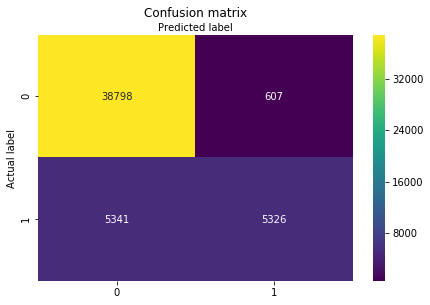

In [377]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("./Images/Copy1confusion.png", bbox_inches="tight")

In [378]:
## Lady
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:500]}")
print(f"First 10 Actual labels: {y_test[:500].tolist()}")

First 10 Predictions:   [1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 

In [379]:
from sklearn import metrics

predictions = classifier.predict(X_test)

#lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print(metrics.confusion_matrix(y_test, predictions) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, predictions))

# print(f"First 10 Predictions:   {predictions[:1000]}")
# print(f"First 10 Actual labels: {y_test[:1000].tolist()}")

Accuracy: 0.8868
[[38831   574]
 [ 5092  5575]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     39405
           1       0.91      0.52      0.66     10667

   micro avg       0.89      0.89      0.89     50072
   macro avg       0.90      0.75      0.80     50072
weighted avg       0.89      0.89      0.87     50072



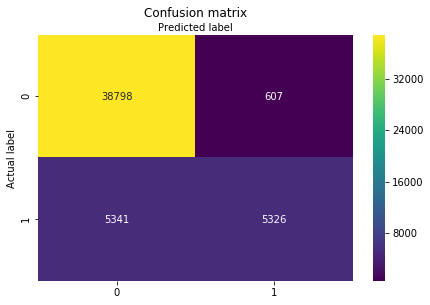

In [380]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("./Images/Model2confusion.png", bbox_inches="tight")

In [381]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,1
2,0,0
3,0,0
4,0,1
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [382]:
confusion_matrix(y_test, predictions)

array([[38831,   574],
       [ 5092,  5575]], dtype=int64)

In [383]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"tn: {tn:3d}   fp: {fp:3d}")
print(f"fn: {fn:3d}   tp: {tp:3d}")

tn: 38831   fp: 574
fn: 5092   tp: 5575


In [384]:
### Save the trained model
from sklearn.externals import joblib

joblib.dump(classifier, "./chicago-crime-trained-model-js-2.pkl")

['./chicago-crime-trained-model-js-2.pkl']

In [385]:
y_pred=classifier.predict(X_test)

In [386]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38831,   574],
       [ 5092,  5575]], dtype=int64)

In [387]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8868429461575331
Precision: 0.9066514880468369
Recall: 0.5226399175025781


In [388]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8874221121584918
Testing Data Score: 0.8868429461575331


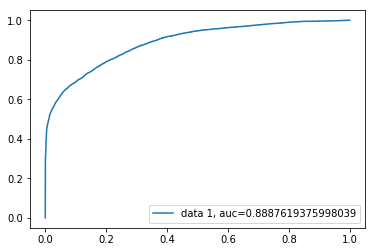

In [389]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [390]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.7540366190735832
